In [1]:
import sys
sys.version

'3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]'

# Install the necessary libraries by yourself
- NumPy
- Pandas
- RDKit: https://www.rdkit.org/docs/Install.html
- OpenBabel: https://anaconda.org/conda-forge/openbabel
- Therapeutic Data Commons (TDC): https://tdcommons.ai/start

In [2]:
import numpy as np
import pandas as pd

from rdkit import Chem
from tdc.single_pred import ADME

In [3]:
np.__version__, pd.__version__

('1.26.4', '2.2.3')

# Download the BBB dataset from TDC

In [4]:
data = ADME(name = 'BBB_Martins')

Found local copy...
Loading...
Done!


In [5]:
data

In [6]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'balanced',
 'binarize',
 'convert_format',
 'convert_from_log',
 'convert_result',
 'convert_to_log',
 'entity1',
 'entity1_idx',
 'entity1_name',
 'file_format',
 'get_approved_set',
 'get_data',
 'get_label_meaning',
 'get_other_species',
 'get_split',
 'harmonize',
 'label_distribution',
 'label_name',
 'name',
 'path',
 'print_stats',
 'raw_format',
 'y']

# Dataset splitting
## Random splitting

In [7]:
random_splitted = data.get_split(
    method='random',
    frac=[0.7, 0.1, 0.2],
    seed=999,
)

In [8]:
type(random_splitted)

dict

In [9]:
random_splitted.keys()

dict_keys(['train', 'valid', 'test'])

In [10]:
train_random = random_splitted['train']
train_random

,Drug_ID,Drug,Y
0,Terbutylchlorambucil,CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1,1
1,40730,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,1
2,cloxacillin,Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...,1
3,cefoperazone,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3C(C(=...,1
4,rolitetracycline,CN(C)[C@@H]1C(=O)/C(=C(/O)NCN2CCCC2)C(=O)[C@@]...,1
...,...,...,...
1416,zometapine,CC1=C2C(c3cccc(Cl)c3)=NCCN=C2N(C)N1,1
1417,licostinel,O=c1[nH]c2cc(Cl)c(Cl)c([N+](=O)[O-])c2[nH]c1=O,1
1418,ademetionine(adenosyl-methionine),C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,1
1419,mesocarb,CC(Cc1ccccc1)n1cc([N-]C(=O)Nc2ccccc2)[o+]n1,1


## Scaffold splitting

In [11]:
scaffold_splitted = data.get_split(
    method='scaffold',
    frac=[0.7, 0.1, 0.2],
    seed=999,
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [00:00<00:00, 2616.39it/s]


In [12]:
train_scaffold = scaffold_splitted['train']
train_scaffold

,Drug_ID,Drug,Y
0,Terbutylchlorambucil,CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1,1
1,brosotamide,Cc1cc(Br)cc(C(N)=O)c1O,1
2,butacetin,CC(=O)Nc1ccc(OC(C)(C)C)cc1,1
3,Salicyluricacid,O=C(O)CNC(=O)c1ccccc1O,1
4,sumacetamol,CSCC[C@H](NC(C)=O)C(=O)Oc1ccc(NC(C)=O)cc1,1
...,...,...,...
1416,oxytetracycline,CN(C)[C@@H]1C(=O)/C(=C(\N)O)C(=O)[C@@]2(O)C(=O...,0
1417,Auxeomycin,CN(C)[C@@H]1C(=O)/C(=C(\N)O)C(=O)[C@@]2(O)C(=O...,0
1418,Terconazole,CC(C)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4cncn4)(c4cc...,0
1419,cefditoren,CO/N=C(\C(=O)NC1C(=O)N2C(C(=O)O)=C(/C=C\c3scnc...,0


# Extract SMILES and BBB labels

In [13]:
smi_list = list(train_scaffold['Drug'])
mol_list = [Chem.MolFromSmiles(smi) for smi in smi_list]
label_list = list(train_scaffold['Y'])

In [14]:
smi_list[:10]

['CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1',
 'Cc1cc(Br)cc(C(N)=O)c1O',
 'CC(=O)Nc1ccc(OC(C)(C)C)cc1',
 'O=C(O)CNC(=O)c1ccccc1O',
 'CSCC[C@H](NC(C)=O)C(=O)Oc1ccc(NC(C)=O)cc1',
 'Cc1ccccc1',
 'C[C@H](N)Cc1ccccc1',
 'CCCCC/C(=N/OCCN)c1ccc(C)c(N)c1',
 'C#CC(OC(N)=O)c1ccccc1',
 'NS(=O)(=O)c1ccc(C(=O)O)cc1']

In [15]:
label_list[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Convert SMILES to RDKit Mol object

In [16]:
smi = smi_list[0]

In [17]:
smi

'CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1'

In [18]:
type(smi)

str

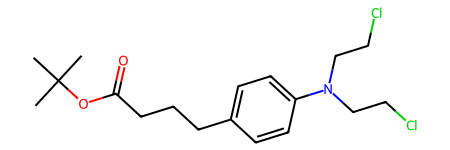

In [19]:
mol = Chem.MolFromSmiles(smi)
mol

In [20]:
type(mol)

rdkit.Chem.rdchem.Mol

# Draw Top-50 molecules in the train set in a single grid image

In [21]:
smi_top50 = smi_list[:50]
id_top50 = list(train_scaffold['Drug_ID'])[:50]
mol_top50 = [Chem.MolFromSmiles(smi) for smi in smi_top50]

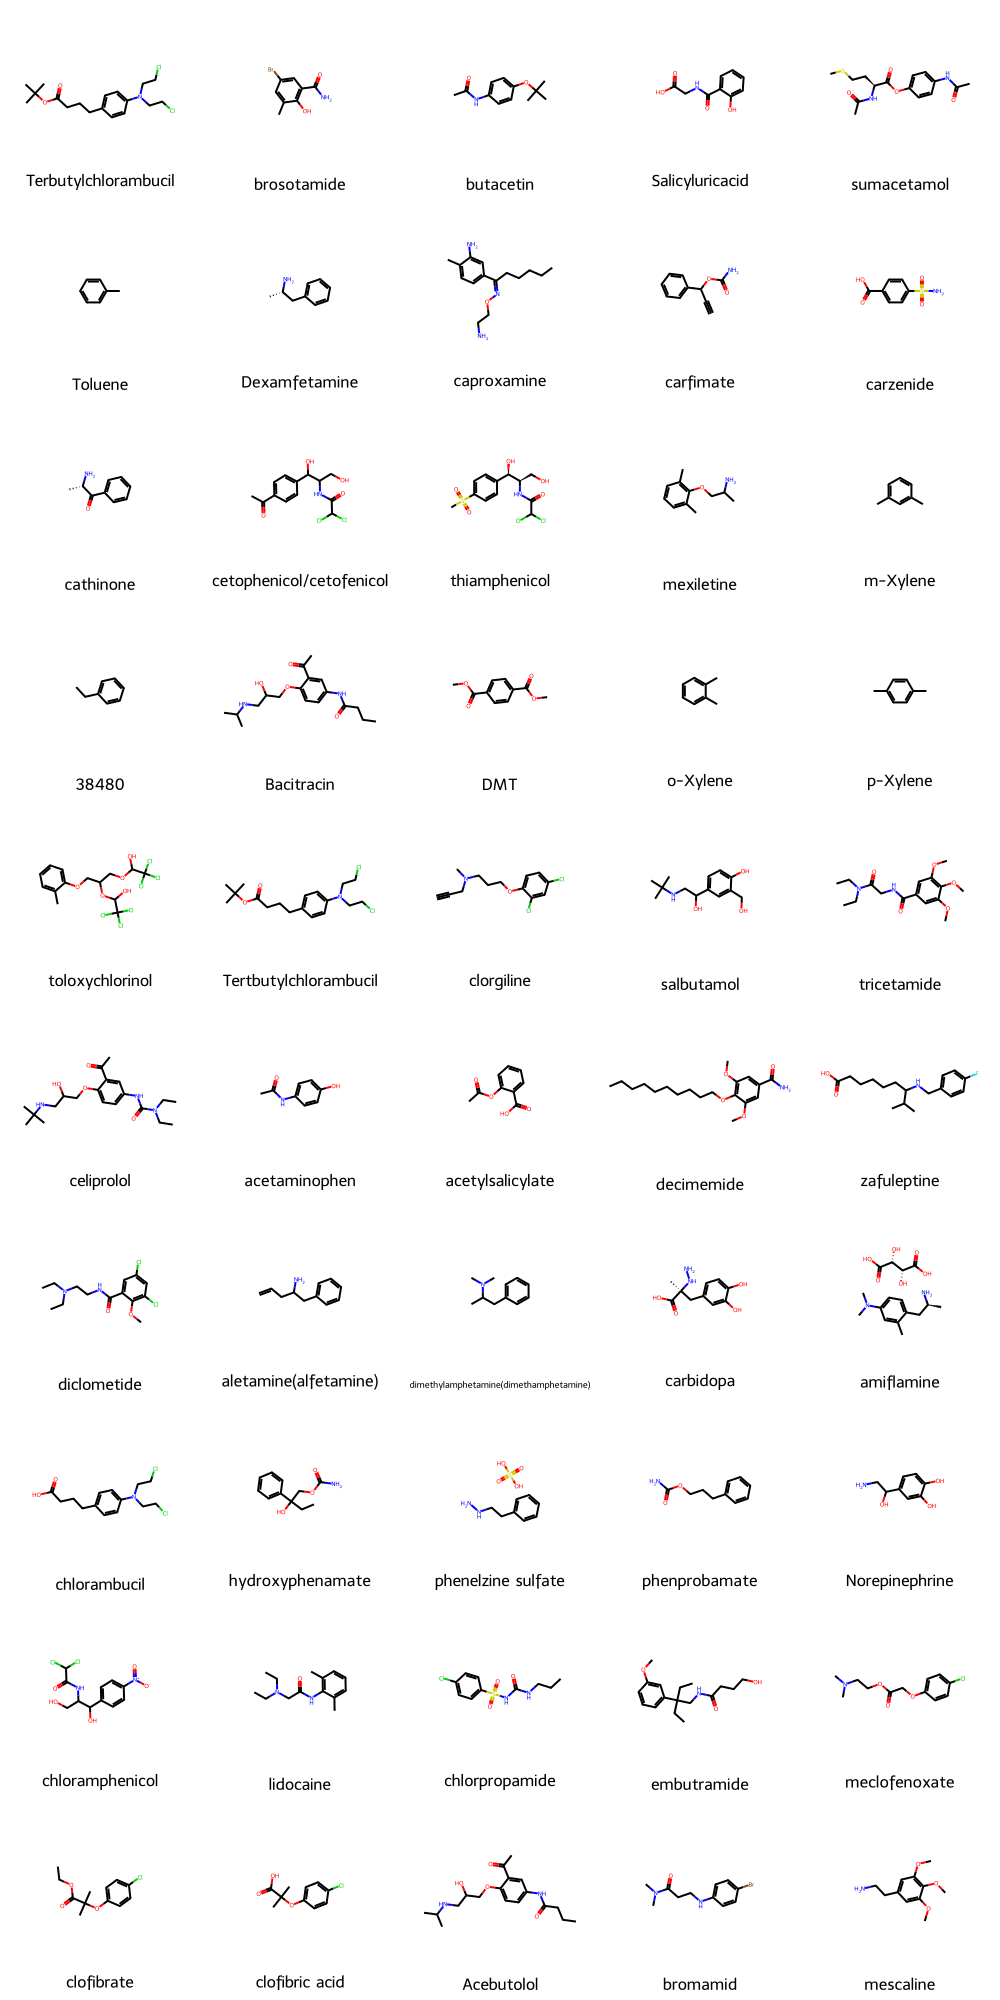

In [22]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mol_top50, legends=id_top50, molsPerRow=5)

# Substructure matching

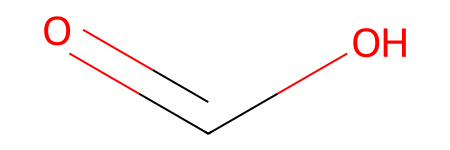

In [23]:
smi_pattern = 'C(=O)O'
mol_pattern = Chem.MolFromSmiles(smi_pattern)
mol_pattern

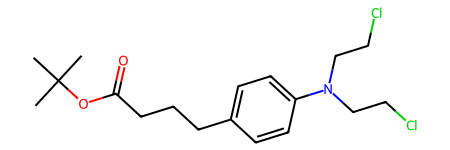

In [24]:
mol_0 = mol_list[0]
mol_0

In [25]:
mol_0.HasSubstructMatch(mol_pattern)

True

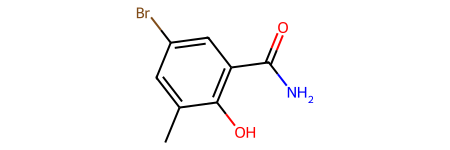

In [26]:
mol_1 = mol_list[1]
mol_1

In [27]:
mol_1.HasSubstructMatch(mol_pattern)

False

## Filtering the entire train set

In [28]:
filter_result = []
for idx, mol in enumerate(mol_list):
    if mol.HasSubstructMatch(mol_pattern):
        filter_result.append(idx)

In [29]:
df_filtered = train_scaffold.iloc[filter_result]
df_filtered

,Drug_ID,Drug,Y
0,Terbutylchlorambucil,CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1,1
3,Salicyluricacid,O=C(O)CNC(=O)c1ccccc1O,1
4,sumacetamol,CSCC[C@H](NC(C)=O)C(=O)Oc1ccc(NC(C)=O)cc1,1
8,carfimate,C#CC(OC(N)=O)c1ccccc1,1
9,carzenide,NS(=O)(=O)c1ccc(C(=O)O)cc1,1
...,...,...,...
1394,hydroxypethidine,CCOC(=O)C1(c2cccc(O)c2)CCN(C)CC1,1
1396,alphaprodine(betaprodine),CCC(=O)OC1(c2ccccc2)CCN(C)CC1C,1
1405,scopolamine,CN1[C@H]2CC(OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C...,0
1419,cefditoren,CO/N=C(\C(=O)NC1C(=O)N2C(C(=O)O)=C(/C=C\c3scnc...,0


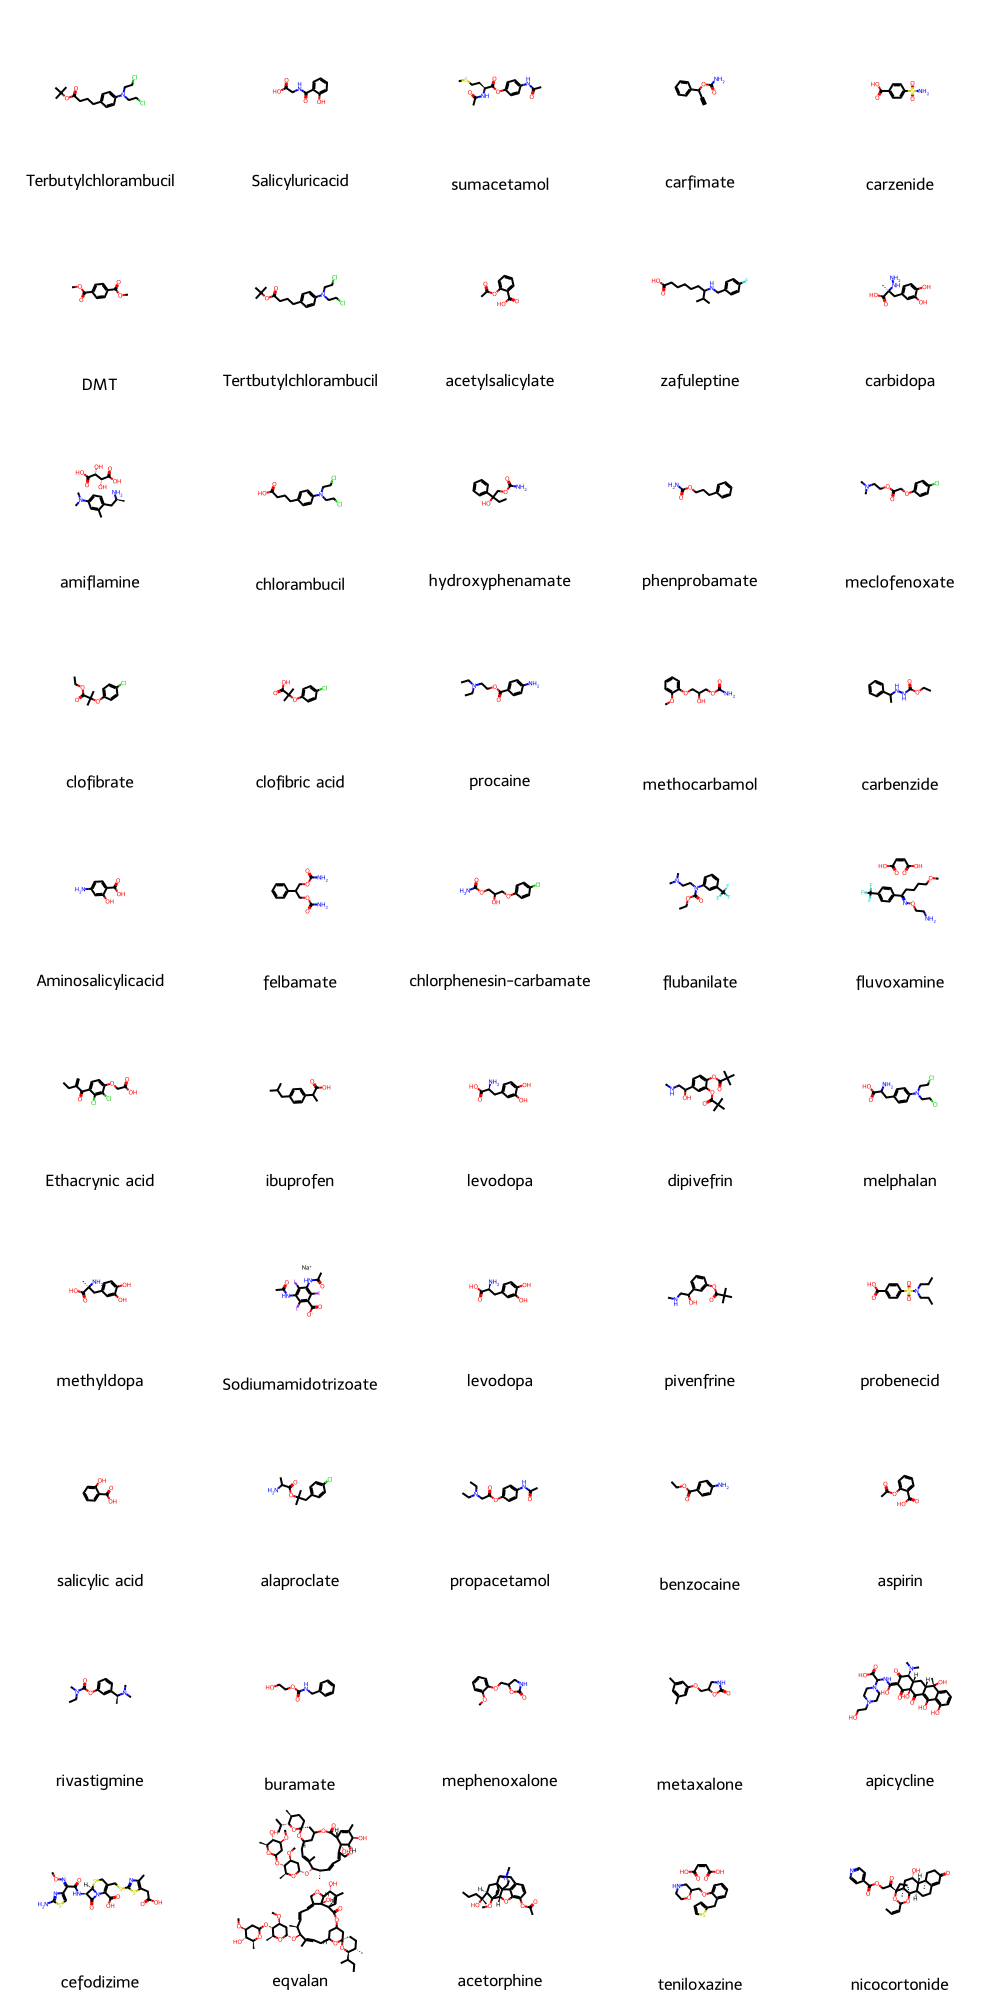

In [30]:
smi_filtered = list(df_filtered['Drug'])
id_filtered = list(df_filtered['Drug_ID'])
mol_filtered = [Chem.MolFromSmiles(smi) for smi in smi_filtered]

Draw.MolsToGridImage(mol_filtered, legends=id_filtered, molsPerRow=5)

#### Note that the filtered compounds have carboxylic group (-COOH) or ester group (-COO-)

# Convert SMILES to vector-represented embeddings (molecular descriptors)
- RDKFingerprint
- MorganFingerprint
- MACCS (Molecular ACCess System)

In [31]:
smi_list = list(train_scaffold['Drug'])
label_list = list(train_scaffold['Y'])
mol_list = [Chem.MolFromSmiles(smi) for smi in smi_list]

In [32]:
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem

In [33]:
rdk_fp = Chem.RDKFingerprint(mol_list[0])
rdk_fp

In [34]:
macc = Chem.RDKFingerprint(mol_list[0])
rdk_fp

# Similarity comparison of two given compounds

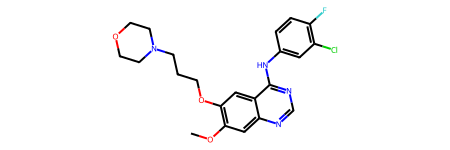

In [35]:
# Gefitinib: EGFR-TKI
smi_g = 'C1COCCN1CCCOc2c(OC)cc3ncnc(c3c2)Nc4cc(Cl)c(F)cc4'
mol_g = Chem.MolFromSmiles(smi_g)
mol_g

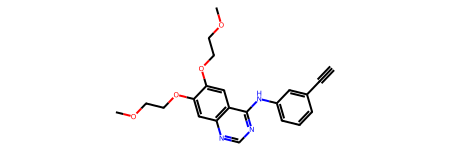

In [36]:
# Erlotinib: EGFR-TKI
smi_e = 'COCCOc1cc2c(cc1OCCOC)ncnc2Nc3cccc(c3)C#C'
mol_e = Chem.MolFromSmiles(smi_e)
mol_e

In [37]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit.DataStructs import TanimotoSimilarity

fp_gen = GetMorganGenerator(radius=2, fpSize=1024)

In [38]:
fp_g = fp_gen.GetFingerprint(mol_g)
fp_e = fp_gen.GetFingerprint(mol_e)

In [39]:
fp_g, fp_e

(<rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x14b45dffe180>,
 <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x14b45dffe110>)

In [40]:
similarity = TanimotoSimilarity(fp_g, fp_e)
similarity

0.40789473684210525

## Filtering molecules with Tanimoto similarity

In [41]:
def get_similarity(
        mol_query, 
        mol_key,
        fp_gen,
    ):
    fp_query = fp_gen.GetFingerprint(mol_query)
    fp_key = fp_gen.GetFingerprint(mol_key)
    similarity = TanimotoSimilarity(fp_query, fp_key)
    return similarity

In [42]:
fp_gen = GetMorganGenerator(radius=2, fpSize=1024)

mol_list = [Chem.MolFromSmiles(smi) for smi in smi_list]
mol_query = mol_list[0]

idx_list = []
for idx, mol in enumerate(mol_list):
    sim_result = get_similarity(
        mol_query=mol_query,
        mol_key=mol_list[idx],
        fp_gen=fp_gen
    )
    if sim_result > 0.3:
        idx_list.append(idx)

len(idx_list)

4

In [43]:
df_filtered = train_scaffold.iloc[idx_list]
df_filtered

,Drug_ID,Drug,Y
0,Terbutylchlorambucil,CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1,1
21,Tertbutylchlorambucil,CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1,1
35,chlorambucil,O=C(O)CCCc1ccc(N(CCCl)CCCl)cc1,0
86,melphalan,NC(Cc1ccc(N(CCCl)CCCl)cc1)C(=O)O,0
